---
# Name of Method - Model 2
---
In this notebook, ...


## Results

---

### Importing necessary library

In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree

### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned_featEng.xlsx')
churn_df

,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_Yes,Online Backup_Yes,Device Protection_Yes,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
1,2,70.70,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
2,8,99.65,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
3,28,104.80,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,0
4,49,103.70,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
7039,24,84.80,0,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1
7040,72,103.20,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0
7041,11,29.60,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [3]:
# Seperate X and y features
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']

### Split dataset (training/testing)

In [4]:
# Separating the dataset into a training dataset (80%) and testing+validation (20%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.8, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (10%) and a validation dataset (10%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)

### Converting data subset to dataframe 

In [5]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Scale X features

In [6]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

<center>
    
## Decision Tree Model

</center>

---

### Find best parameters for model
---

**Create intance of model**

In [7]:
dtc = DecisionTreeClassifier(class_weight='balanced') 

**Setting parameters for the GridSearch**

In [8]:
param_grid = { 'criterion' : ['gini', 'entropy', 'log_loss'],
               'splitter' : ['best','random'],
               'max_depth' : [3,5,8,10,15,20,40]
             }

**Setting instance of GridSearchCV**

In [9]:
grid = GridSearchCV(dtc, param_grid)

**Train the models to find best parameters**

In [11]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 8, 10, 15, 20, 40],
                         'splitter': ['best', 'random']})

---
### Investigate best model's predictive features

---

In [14]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [15]:
grid.best_score_

np.float64(0.7612717710452781)

In [16]:
grid.n_features_in_

17

In [22]:
model = grid.best_estimator_

**Plot Decision Tree Arborescence**

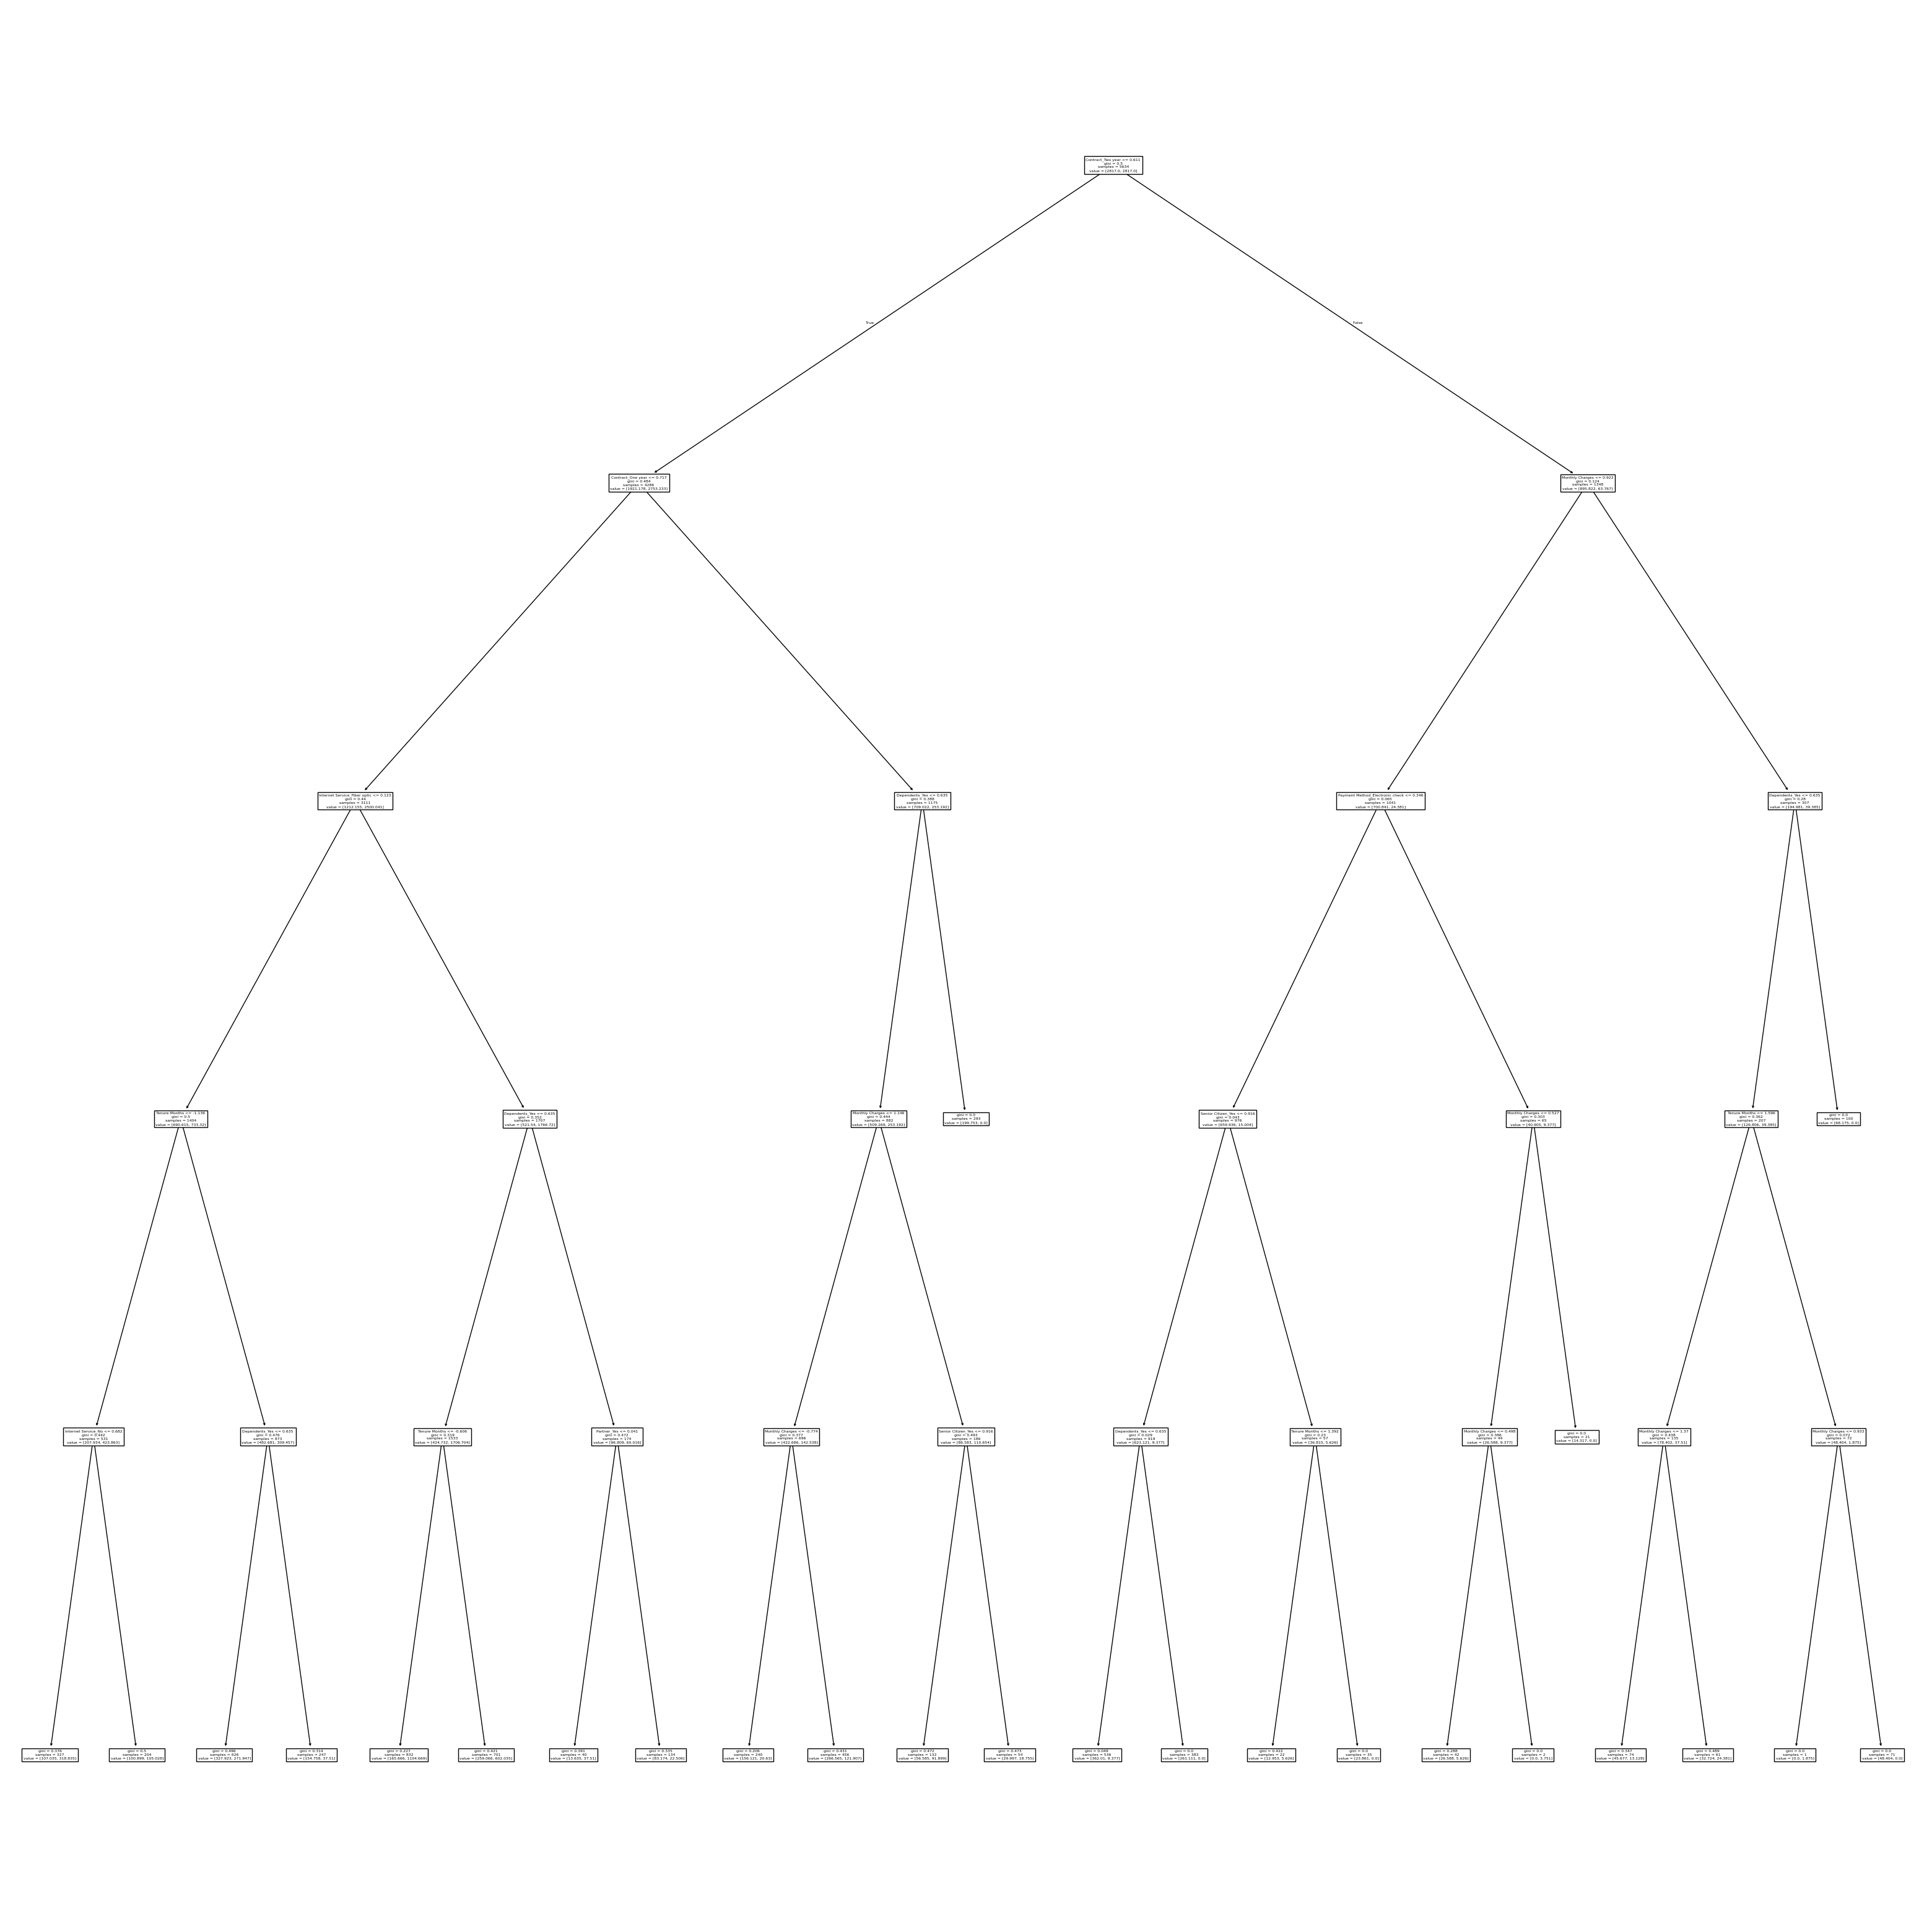

In [26]:
# Create figure and adjust size
plt.figure(figsize=(50,50))

# Plot decision tree
plot_tree(model, feature_names=X_train.columns)

# Save decision tree
plt.savefig('../graph/DecisionTreeClassifier.png')

# Show model
plt.show()

---

<center>
    
## Validation

</center>

---

### Run model on testing dataset

### Model's validation

---

<center>
    
## Results

</center>

---

### Results